### 1- Applying the logistic regression

In [1]:
# Since we've already preprocessed the Titanic dataset in the previous check point , we export the final dataframe
# to a csv file and we import it here . 

In [2]:
import pandas as pd
tp_final=pd.read_csv('tp_final.csv')
tp_final.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,0,2,1,28.0,0,0,13.0000,2,Mr
1,1,0,3,1,25.0,0,0,7.6500,2,Mr
2,2,0,3,1,20.0,0,0,7.8542,2,Mr
3,3,0,3,0,29.0,0,4,21.0750,2,Mrs
4,4,0,1,1,31.0,1,0,52.0000,2,Mr


In [3]:
tp_final.drop('Unnamed: 0',axis=1,inplace=True)
tp_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,2,1,28.0,0,0,13.0000,2,Mr
1,0,3,1,25.0,0,0,7.6500,2,Mr
2,0,3,1,20.0,0,0,7.8542,2,Mr
3,0,3,0,29.0,0,4,21.0750,2,Mrs
4,0,1,1,31.0,1,0,52.0000,2,Mr


In [4]:
# The title column should be encoded
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
tp_final['title']=encoder.fit_transform(tp_final['title'])
tp_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,2,1,28.0,0,0,13.0000,2,11
1,0,3,1,25.0,0,0,7.6500,2,11
2,0,3,1,20.0,0,0,7.8542,2,11
3,0,3,0,29.0,0,4,21.0750,2,12
4,0,1,1,31.0,1,0,52.0000,2,11


In [5]:
# logistic regression : 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x=tp_final[["Pclass", "Sex", "Age", "SibSp","Parch","Embarked","title"]]
y=tp_final["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))


Accuracy=0.80


In [6]:
# According to the accuracy measure , the logistic regression's performance is good . 

### 2- Confusion Matrix

In [7]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
print(confusion_matrix)

Predicted    0   1
Actual            
0          160  29
1           33  90


In [8]:
# Out of the passengers tested : 160 were predicted not to survive and this is True , 90 were predicted to survive and this
# is true , 29 were predicted to survive and this is false , and 33 were predicted not to survive and this is false . 

In [9]:
# Calculate the other metrics :

In [10]:
accuracy=(160+90)/(160+29+30+90)
print(' the accuracy is :',accuracy)

 the accuracy is : 0.8090614886731392


In [11]:
# out of all the tested predictions , 80 % are correct . 

In [12]:
recall=90/(33+90)
print('the recall is :',recall)

the recall is : 0.7317073170731707


In [13]:
# Out of the tested passengers that survived , 73% correspond to our predictions .  

In [14]:
precision=90/(29+90)
print('the precision is :',precision)

the precision is : 0.7563025210084033


In [15]:
# Out of the tested passengers that we predicted to survive , 75% are correct . 

### 3- Explaining the ROC/AUC 

### The ROC : 
The ROC is a curve that summarizes all of the confusion matrices that each threshhold produces . In fact , the confusion matrix that we analyzed above is the confusion matrix for a threshhold =0.5 ( the input that gives a propability >= 0.5 is classified as 1 , otherwise it's classified as 0 ) . But what if we want to change the threshold ? which threshhold is the most suitable ? --> For each threshold , there's a unique confusion matrix from which we can extract the
TPR ( true positive rate ) and FPR ( false positive rate) and to a couple of these metrics corresponds a point in the ROC .
Depending on the situation , a point in the ROC is better than the other ( in a risky situation , we would prefer to have an FPR = 1 and TPR = 1 thus we would lower the threshhold as much as possible) . 
### The AUC : 
It's the area under the ROC curve . It tells us whether the model is capable of distinguishing between classes . The higher the AUC , the better the model is at predicting the correct class . The lower the AUC , the poorer the model is because it predicts 0s as 1s and 1s as 0s . 



### 4- Applying the ROC / AUC on our model 

In [16]:
pip install plot_metric

Note: you may need to restart the kernel to use updated packages.


In [17]:
from plot_metric.functions import BinaryClassification

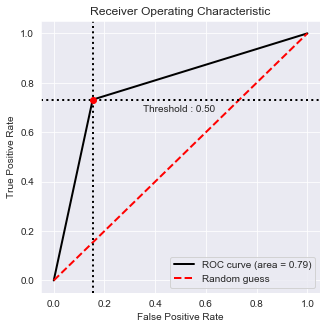

In [19]:
import matplotlib.pyplot as plt
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

The AUC = 0,79 which is close to 1 --> This implies that there's a 79% chance that our logistics regression model will be able to distinguish between survivors and non survivors . The red dot in the curve represents the point for which the confusion matrix is the one that we analyzed above ( threshold = 0.5 ) . The more we decrease the threshold ,the higher the FPR is and the higher the TPR is . The more we increase the threshold , the lower the FPR is and the lower the TPR is . If we think that it's important to predict ALL the survivors as survivors then our best choice is to lower the threshhold as much as possible . 